In [5]:
# Importing libraries
import sys
import sklearn
import matplotlib
import numpy as np

In [6]:
# Using keras to get the MNIST dataset of handwritten numbers
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\A1454\AppData\Local\conda\conda\envs\ann\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [8]:
print('Training Data :{}'.format(x_train.shape))
print('Training Labels :{}'.format(y_train.shape))

Training Data :(60000, 28, 28)
Training Labels :(60000,)


In [9]:
print('Testing Data:{}'.format(x_test.shape))
print('Testing Labels :{}'.format(y_test.shape))

Testing Data:(10000, 28, 28)
Testing Labels :(10000,)


In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\A1454\AppData\Local\conda\conda\envs\ann\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


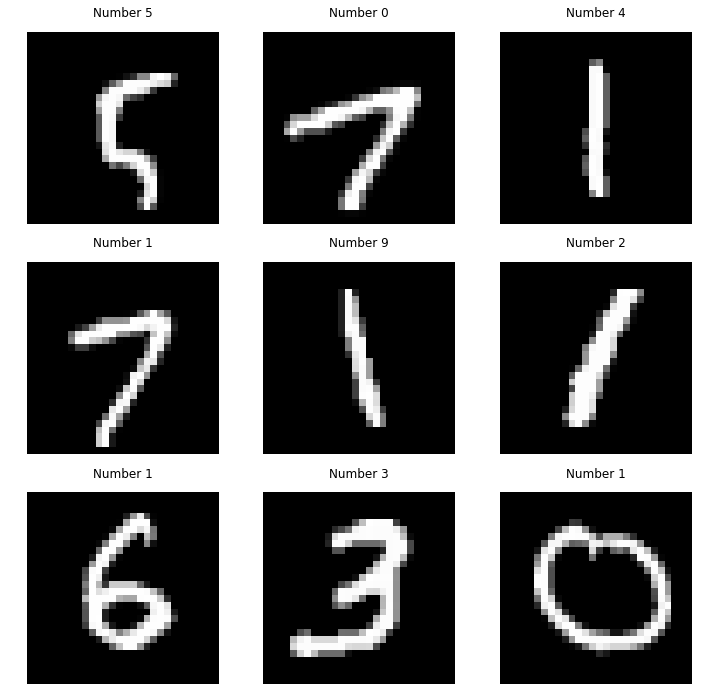

In [11]:
# Create a figure with 3 by 3 subplots

fig,axs = plt.subplots(3,3,figsize =(12,12))
plt.gray()

# Loop and add images
for i,ax in enumerate(axs.flat):
    ax.matshow(x_train[100+i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
# Display the figure
fig.show()


In [12]:
# Preprocessing the images
# Convert each image to 1D array
X = x_train.reshape(len(x_train),-1)
Y = y_train

# Normalize the data and [0-1]

X = X.astype(float) / 255.

In [13]:
print(X[0].shape)
print(X[0])

(784,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.  

In [14]:
# Importing algorithms for clustering

from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=n_digits)
kmeans.fit(X)



10


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [15]:
kmeans.labels_[:20]

array([4, 6, 8, 3, 7, 2, 9, 1, 9, 2, 4, 3, 4, 5, 9, 2, 3, 2, 5, 2])

In [16]:
# Inferring cluster labels
def infer_cluster_labels(kmeans,actual_labels):
   
    inferred_labels = {}
    
    for i in range(kmeans.n_clusters):
        
        # Find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)
        
        labels.append(actual_labels[index])
        
        #Append actual labels for each point in cluster
        if len(labels[0]) == 1:
            counts= np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
        
        #Assign cluster to value in inferred labels dictionary
        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)]=[i]
            
    return inferred_labels

def infer_data_labels(X_label,cluster_labels):
    #empty array of len(x)
    predicted_labels = np.zeros(len(X_label)).astype(np.uint8)
    
    for i,cluster in enumerate(X_label):
        for key,value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i]= key
                
    return predicted_labels
        

In [17]:
# Testing the functions
cluster_labels = infer_cluster_labels(kmeans ,Y)
X_clusters = kmeans.predict(X)
predicted_labels =infer_data_labels(X_clusters,cluster_labels)
print (predicted_labels[:20])
print (Y[:20])

[3 0 4 2 7 4 1 8 1 4 3 2 3 6 1 4 2 4 6 4]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [18]:
# Optimizing and evaluating the clustering algortihm

from sklearn import metrics

def calculate_metrics(estimator,data,labels):
    
    #calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia : {}'.format((estimator.inertia_)))
    print('Homogeneity:{}'.format(metrics.homogeneity_score(labels,estimator.labels_)))

In [19]:
clusters = [10,16,36,64,144,256,400]

# Test different number  of cluster
for n_clusters in clusters:
    
    estimator=MiniBatchKMeans(n_clusters=n_clusters)
    estimator.fit(X)
    
    # Calculate metrics
    calculate_metrics(estimator,X,Y)
    
    # Determine predicted labels
    cluster_labels= infer_cluster_labels(estimator,Y)
    predicted_Y=infer_data_labels(estimator.labels_,cluster_labels)
    
    print('Accuracy:{}'.format(metrics.accuracy_score(Y,predicted_Y)))
    



Number of Clusters: 10
Inertia : 2402759.4389591096
Homogeneity:0.46150241018623217
Accuracy:0.5371666666666667
Number of Clusters: 16
Inertia : 2208517.114031489
Homogeneity:0.549414269757317
Accuracy:0.63975
Number of Clusters: 36
Inertia : 1953431.4437498038
Homogeneity:0.6943013105353463
Accuracy:0.7741166666666667
Number of Clusters: 64
Inertia : 1815430.2416661584
Homogeneity:0.7393641946232731
Accuracy:0.8121333333333334
Number of Clusters: 144
Inertia : 1635176.0615968108
Homogeneity:0.7949940392427256
Accuracy:0.8534833333333334
Number of Clusters: 256
Inertia : 1516904.34030165
Homogeneity:0.8366743711184994
Accuracy:0.8905166666666666


C:\Users\A1454\AppData\Local\conda\conda\envs\ann\lib\site-packages\sklearn\cluster\k_means_.py:1418: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)


Number of Clusters: 400
Inertia : 1431517.5221293021
Homogeneity:0.8582342851000763
Accuracy:0.9051833333333333


In [20]:
# Test kmeans algo on testing dataset
# Convert each image ro 1D dataset
X_test = x_test.reshape(len(x_test),-1)

# normalize data to (0,1)
X_test = X_test.astype(float)/255.

#intialize an fit kmeans on training data

kmeans =MiniBatchKMeans(n_clusters=256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans,Y)

# Predict labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(test_clusters,cluster_labels)

#calculate accuracy
print('accuracy:{}'.format(metrics.accuracy_score(y_test,predicted_labels)))

accuracy:0.8972


In [ ]:
# Visualize cluster centroids
#intialize and fit kmeans algo
from sklearn.cluster import MiniBatchKMeans
kmeans =MiniBatchKMeans(n_clusters=36)
kmeans.fit(X)

# Record centroid values
centroid =kmeans.cluster_centers_

#Reshape centroids into images
images =centroid.reshape(36,28,28)
images *= 255
images =images.astype(np.unint8)

#Determine cluster labels
cluster_labels =infer_cluster_labels(kmeans,Y)

#Create a figure with subplot using matplotlib.pyplot
fig.axs= plt.subplots(6,6,fig_size=(20,20))
plt.gray()

#Loop through subplots and add centroid images
for i ,ax in enumerate(axs.flat):
    #determine inferred label
    for key,value in cluster_labels.items():
        if i in value :
            ax.set_title('Inferred label:{}'.format(key))
    #add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
#display
fig.show()